 
 # Customer Segmentation Using Clustering

**Objective:**

You are required to develop a customer segmentation model for a bank’s credit card holders.
The goal is to segment customers based on their transaction and credit usage patterns,
allowing the bank to tailor marketing strategies for each segment more effectively.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Step 1 : Data Preprocessing

In [2]:
data = pd.read_csv("Dataset.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info() #To get information about our data and it's columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.shape

(8950, 18)

In [5]:
#To check for missing values in our dataset

data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are two columns in our dataset containing missing value : `CREDIT_LIMIT` and `MINIMUM_PAYMENTS`.



### Handling Missing values

In [6]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace = True)

In [7]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

In [8]:
#Dropping CUST_ID from our dataframe as it won't be helping in finding the cluster

data_imputed = data.drop(['CUST_ID'], axis=1)

In [9]:
data_imputed.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
data_imputed.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Feature Scaling 


Since clustering algorithms like K-Means and DBSCAN are sensitive to the scale of features, I standardized the dataset using `MinMaxScaler`


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data_imputed)

In [13]:
scaled_values[:5]

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, 0.00000000e+00,
        4.24000000e-03, 0.00000000e+00, 1.66667000e-01, 0.00000000e+00,
        8.33330000e-02, 0.00000000e+00, 0.00000000e+00, 5.58659218e-03,
        3.17195326e-02, 3.97863135e-03, 1.82564563e-03, 0.00000000e+00,
        1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.36684909e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.66666667e-01, 3.25203252e-02, 0.00000000e+00,
        2.32053422e-01, 8.08933873e-02, 1.40344791e-02, 2.22222000e-01,
        1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, 1.89682603e-02,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.35195531e-02,
        2.48747913e-01, 1.22643641e-02, 8.20961806e-03, 0.00000000e+00,
        1.00000000e+00],
       [8.75207906e-02, 6.36364000e-01, 3.05671522e-02, 3.677

In [14]:
data_scaled = pd.DataFrame(scaled_values, columns=data_imputed.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


# Step 2 : Exploratory Data Analysis (EDA)

In [15]:
data_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,0.026413,0.041089,0.148390,0.034170,0.011058,0.153715,0.919553
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,0.055485,0.069435,0.121491,0.057078,0.030531,0.292499,0.223055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007556,0.002236,0.000000,1.000000
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.016894,0.004088,0.000000,1.000000
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.215359,0.037482,0.010322,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Identifying Outliers

Using Histogram to find which features has outliers

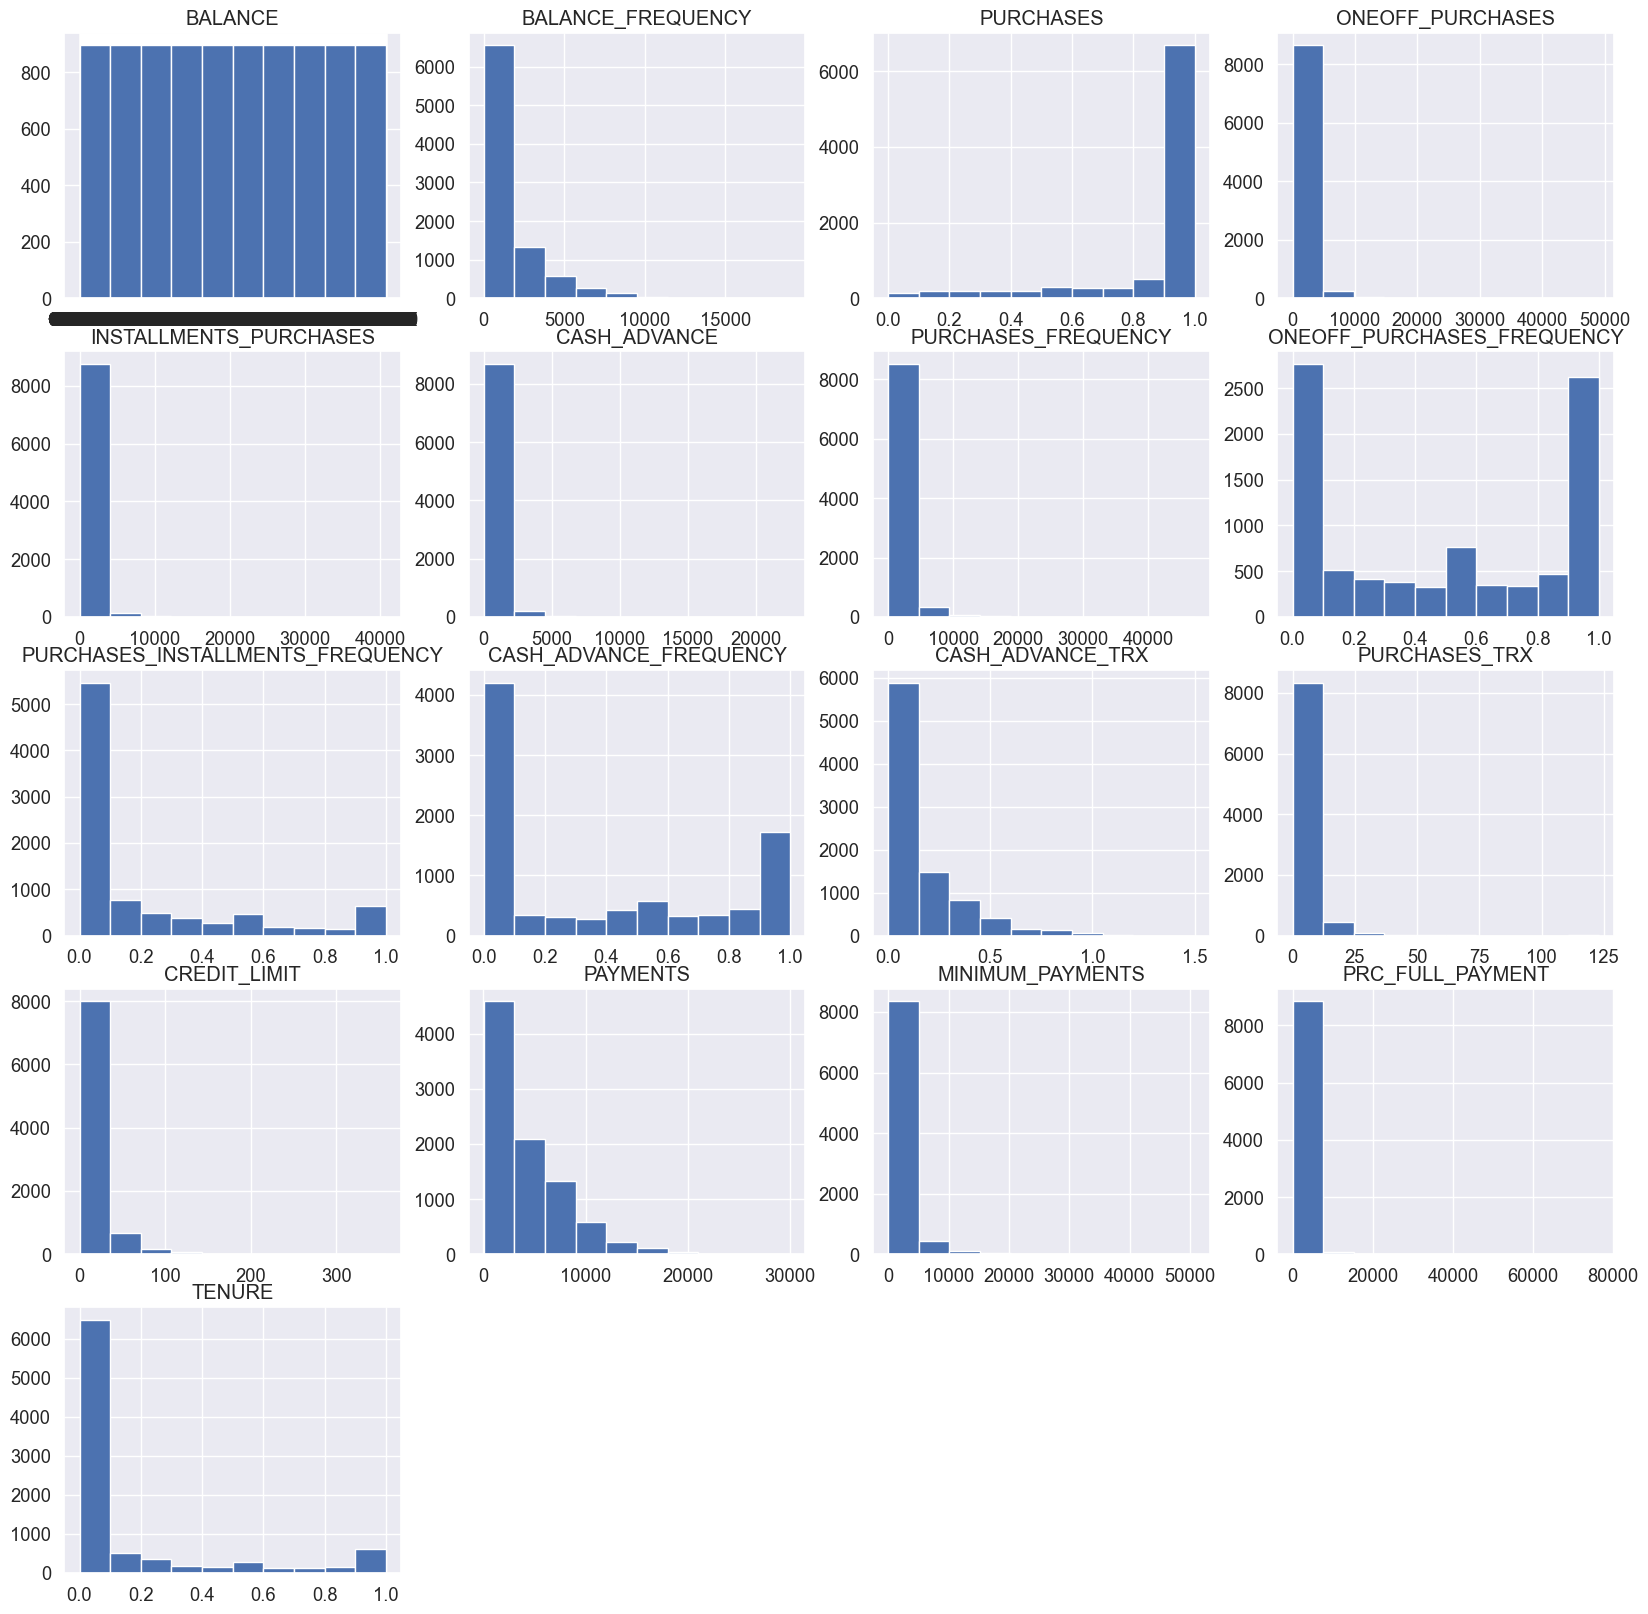

In [61]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize = (20,20))

z = 0
for i in range(5):
    for j in range(4):
        if z > 16:
            axs[i][j].axis(False)
        else:
            axs[i][j].set_title(data_imputed.iloc[:,z].name)
            axs[i][j].hist(data.iloc[:,z])
        z+=1

### HeatMap 

I used heatmaps to explore `feature correlation`

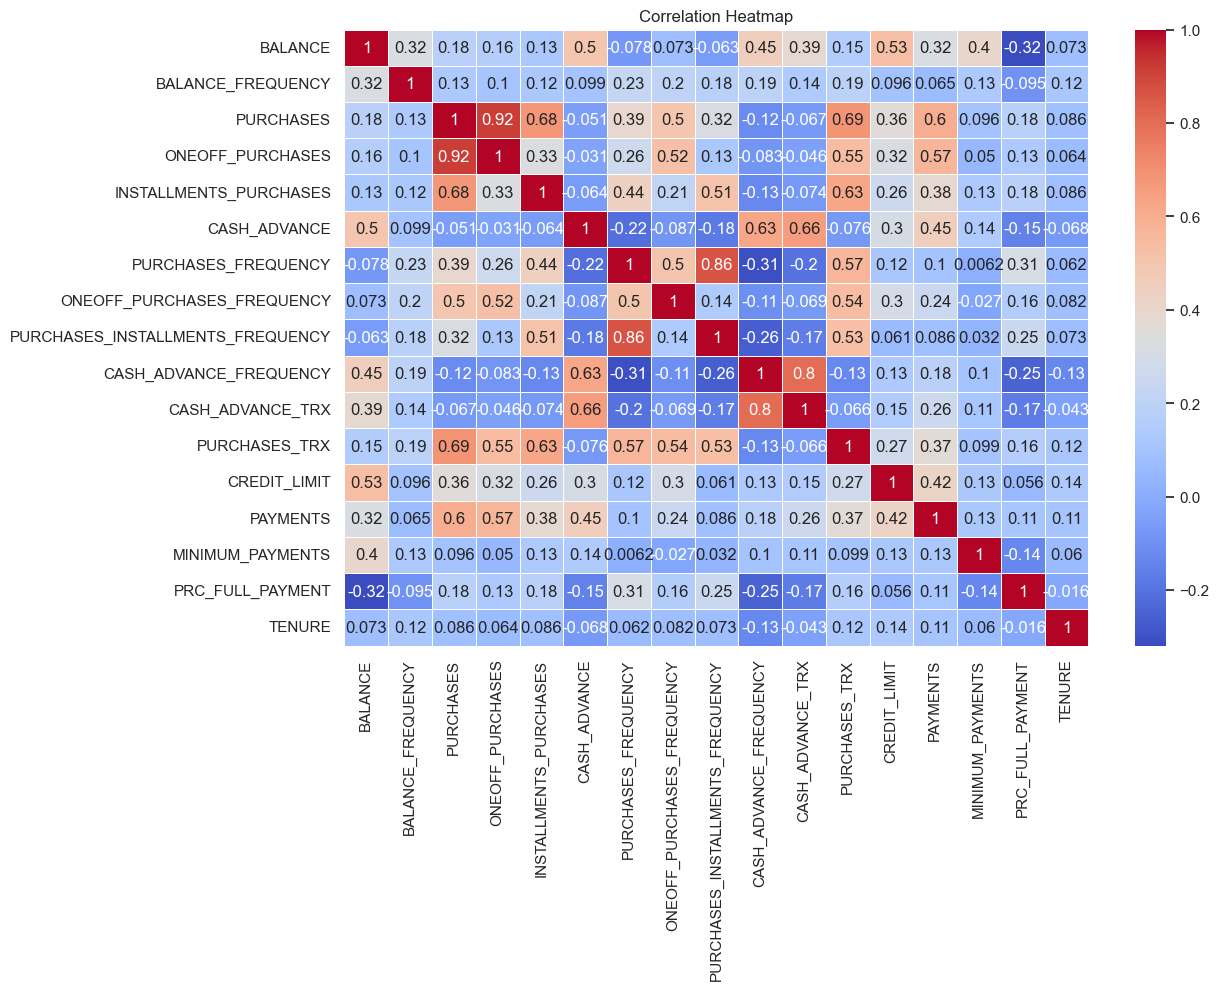

In [16]:

plt.figure(figsize=(12, 8))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()





From the correlation heatmap, it can also be seen that PURCHASES has high positive correlation with 
`ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`

Furthermore, we also notice a relatively strong positive correlation between the column `CREDIT LIMIT` and `BALANCE`. 
It means that the customers with more balance is their account is mostly trusted with more credit limit.


Clearly, we need to remove Some columns to avoid Multi Collinearity. 

## Dropping Outliers

In [17]:
from scipy import stats

z_score = np.abs(stats.zscore(data_scaled))
data_scaled_without_outliers = data_scaled[(z_score < 3).all(axis=1)]
data_scaled_without_outliers.shape

(7434, 17)

In [18]:
# Dropping Purchase column as it has high correlation

df_ready = data_scaled_without_outliers.drop(['PURCHASES'], axis=1)
df_ready.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


# Principal Component Analysis (PCA)

Since our dataset has a lot of features (16 features), we will try reducing the number of features to a smaller set of variables that can be used in further clustering analysis.

In [19]:
from sklearn.decomposition import PCA


In [20]:
pca = PCA(random_state=42).fit(df_ready)
pca_data = pca.transform(df_ready) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.471840,-0.108847,-0.032889,0.062393,-0.050928,-0.154679,-0.004082,0.012505,-0.005933,0.004291,0.006909,0.006327,0.002170,0.000299,0.001120,-0.001708
1,-0.602687,-0.062429,0.121590,-0.178189,-0.058984,0.160210,-0.041031,-0.001472,0.028058,0.050435,-0.053493,0.051983,-0.000507,-0.051690,0.012849,0.004084
2,0.276748,0.965179,-0.136881,0.125879,-0.010331,-0.078849,-0.082242,-0.220461,0.020948,-0.033515,-0.010764,-0.001394,0.016427,-0.001325,-0.011066,-0.003823
3,-0.583469,-0.014029,0.042694,0.198484,-0.089793,0.076584,-0.102331,-0.003378,-0.017621,-0.023210,0.017671,-0.010092,-0.013224,0.007794,0.027493,-0.000511
4,-0.551852,0.016973,-0.082302,-0.103231,-0.042161,-0.165298,-0.025543,0.061104,0.015469,0.003818,-0.002982,0.002735,0.002466,0.001155,-0.003752,-0.003910


In [21]:
explained_var_ratio_per_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1) 
explained_var_ratio_per_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)


explained_var_ratio_per_PCA_df.head()

,0
PC1,54.590109
PC2,15.689937
PC3,14.385230
PC4,6.582886
PC5,3.099912


`explained_variance_ratio_` tells us how much information (variance) each principal component captures from the original dataset.

The first few components explains  most of the variance, and later components capture less variance.

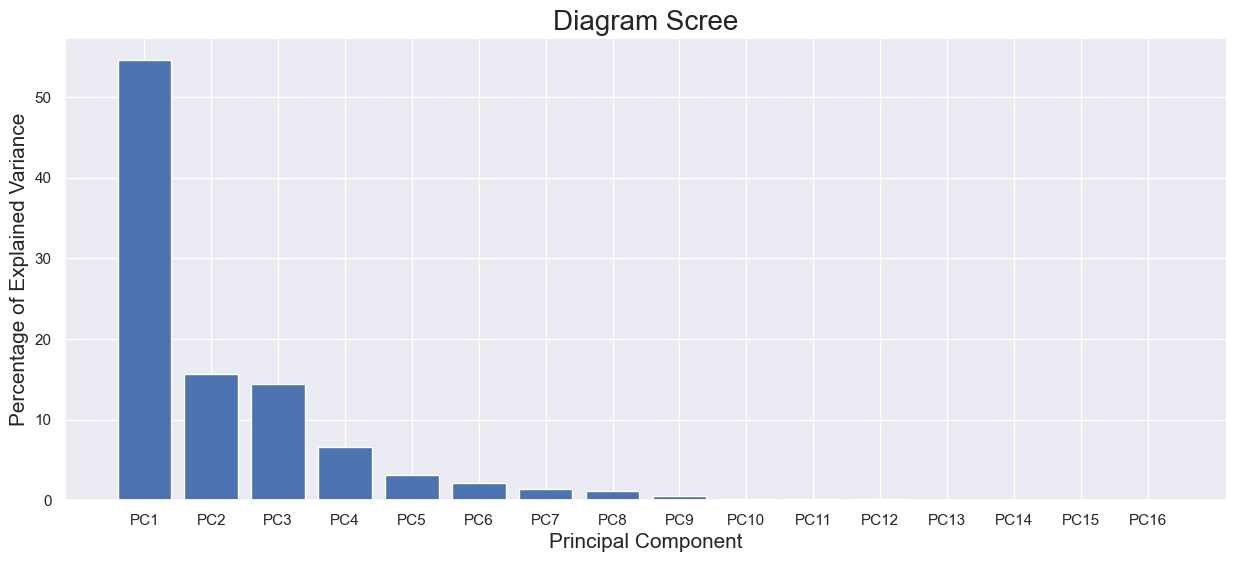

In [22]:
fig = plt.figure(figsize=(15,6))
plt.bar(x=range(1, len(explained_var_ratio_per_PCA)+1), height=explained_var_ratio_per_PCA, tick_label=pca_labels)
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Diagram Scree', fontsize=20)
plt.show()

PC1 PC2  principal components explain a large portion  of the variance, you can reduce your data to just those components, significantly lowering the number of features while retaining most of the important information.

In [23]:
print(f"Total variation explained by PC1 dan PC2 is :{pca.explained_variance_ratio_[:2].sum()*100}")

Total variation explained by PC1 dan PC2 is :70.28004552854105


# K means Clustering 

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

import warnings 
warnings.filterwarnings("ignore")

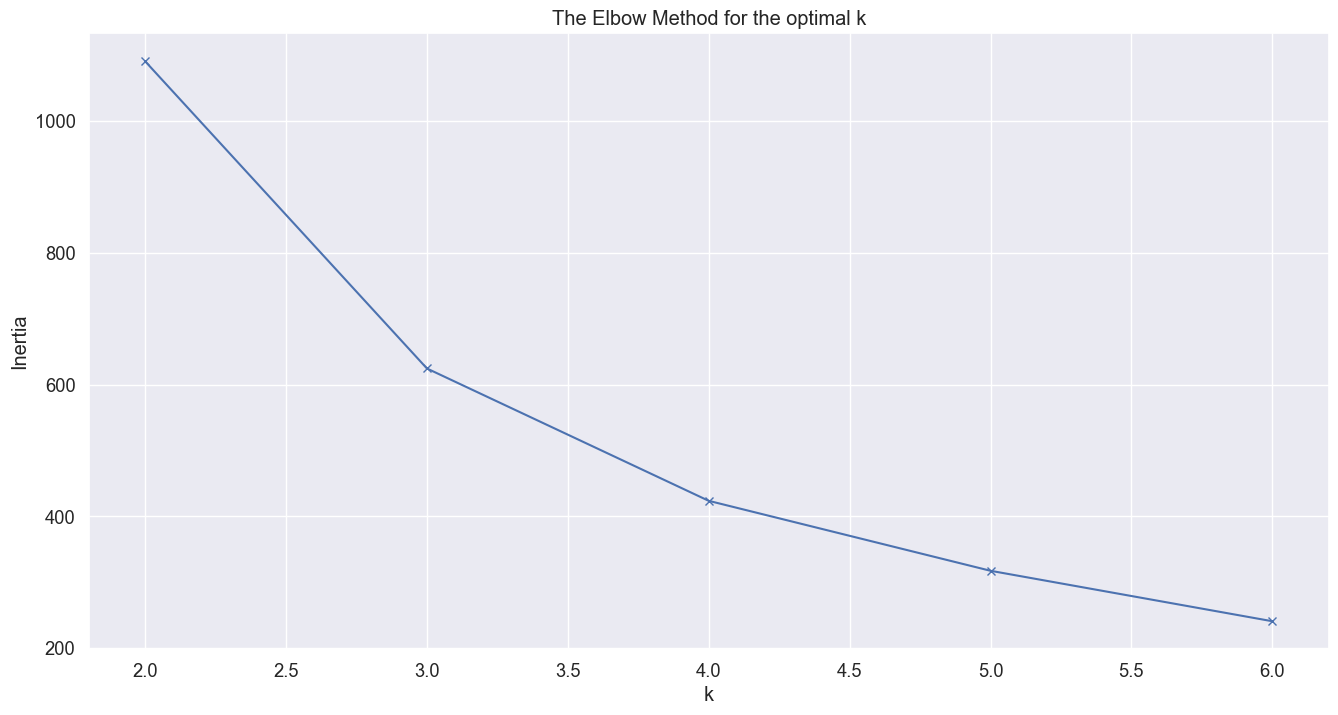

In [49]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

inertia = []
K = np.arange(2,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(pca_clusters)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method for the optimal k')
plt.show()

Using the Elbow method, I determined the optimal number of clusters, which I identified as **3**

In [50]:
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pca_clusters)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(pca_clusters, labels, metric = 'euclidean'))

In [59]:
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pca_clusters)

kmeans_labels = kmeans.labels_

kmeans_silhouette = silhouette_score(pca_clusters, kmeans_labels)
print(f'Silhouette Score for KMeans (n_clusters={n_clusters}): {kmeans_silhouette}')

Silhouette Score for KMeans (n_clusters=3): 0.7532115572328139


### DBSCAN : Density-based clustering algorithm 

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [37]:
# DBSCAN can be sensitive to its parameters, such as epsilon and minimum samples, so I had to fine-tune these values

for eps_value in [0.5, 1, 1.5, 2]:
    dbscan = DBSCAN(eps=eps_value, min_samples=5)
    dbscan.fit(pca_clusters)
    
    labels = dbscan.labels_

   
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f'eps: {eps_value}, Number of clusters: {n_clusters}')

  
    if n_clusters > 1:
        silhouette_avg = silhouette_score(pca_clusters, labels)
        print(f'Silhouette Score for DBSCAN with eps={eps_value}: {silhouette_avg}')
    else:
        print(f'DBSCAN with eps={eps_value} did not create valid clusters.')


eps: 0.5, Number of clusters: 3
Silhouette Score for DBSCAN with eps=0.5: 0.7532115572328139
eps: 1, Number of clusters: 3
Silhouette Score for DBSCAN with eps=1: 0.7532115572328139
eps: 1.5, Number of clusters: 1
DBSCAN with eps=1.5 did not create valid clusters.
eps: 2, Number of clusters: 1
DBSCAN with eps=2 did not create valid clusters.


In [54]:
k_means_clusters = KMeans(n_clusters=3,random_state=8).fit(pca_clusters)
cluster_center = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

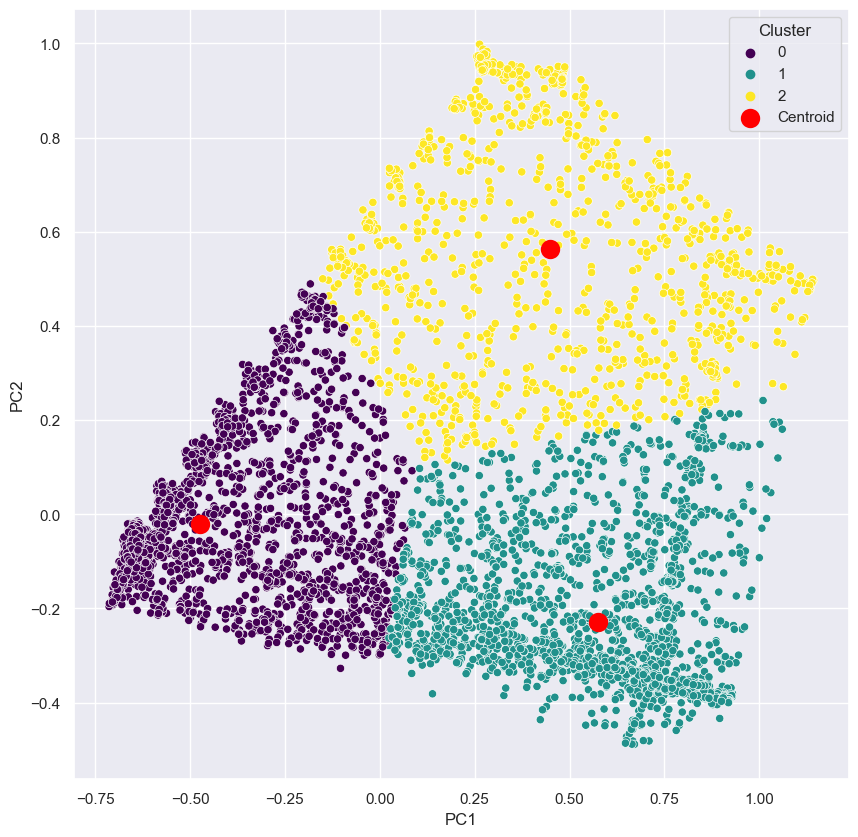

In [46]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10, 10))
sns.set_context(context='notebook', font_scale=1)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_clusters, palette='viridis')

plt.scatter(cluster_center[:, 0], cluster_center[:, 1], marker="o", s=80, linewidths=5, zorder=10, c='red', label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()


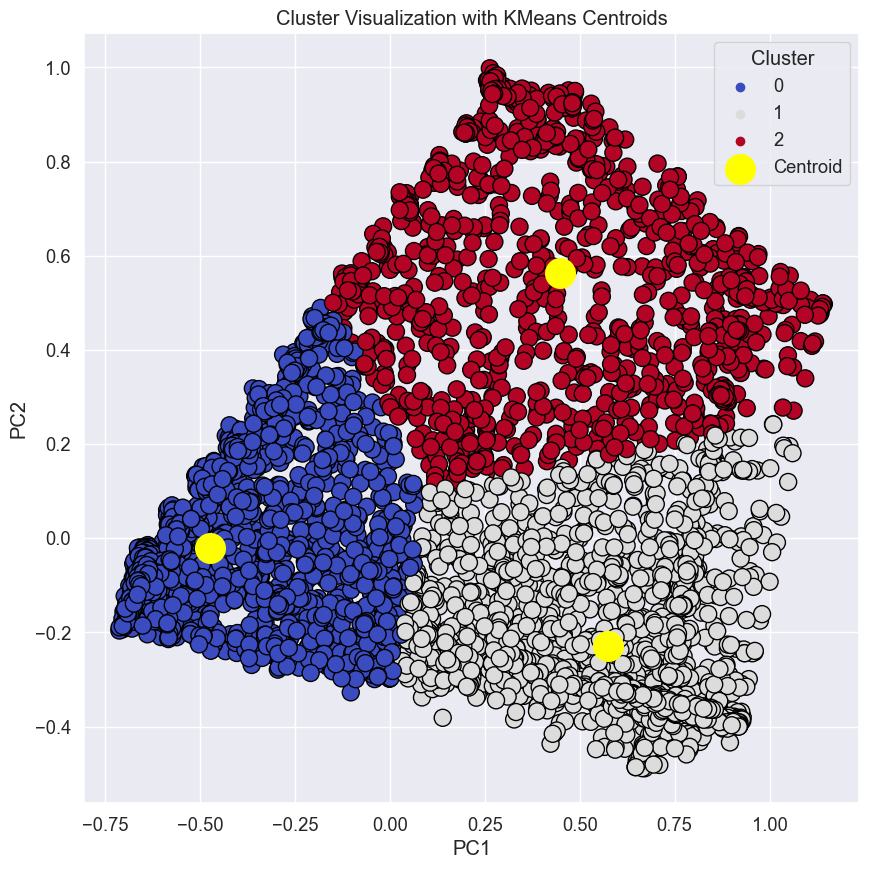

In [55]:
#A better representation of the clusters 

pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10, 10))
sns.set_context(context='notebook', font_scale=1.2)


sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_clusters, palette='coolwarm', s=150, edgecolor='black')

plt.scatter(cluster_center[:, 0], cluster_center[:, 1], marker="o", s=300, linewidths=5, zorder=10, c='yellow', label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.title("Cluster Visualization with KMeans Centroids")
plt.show()


# Cluster Profiling

In [56]:
df_copy = df_ready.copy()
df_copy['cluster'] = cluster_preds
df_copy['cluster'].value_counts()

cluster
0    3937
1    2385
2    1112
Name: count, dtype: int64

In [40]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.002148,0.818182,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0
1,0.168169,0.909091,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,0
2,0.131026,1.000000,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,2
3,0.087521,0.636364,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0,0
4,0.042940,1.000000,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0


In [62]:
cluster_0 = df_copy[df_copy['cluster']==0].drop('cluster', axis=1).mean()
cluster_1 = df_copy[df_copy['cluster']==1].drop('cluster', axis=1).mean()
cluster_2 = df_copy[df_copy['cluster']==2].drop('cluster', axis=1).mean()

In [66]:
cluster_df = pd.DataFrame([cluster_0, cluster_1, cluster_2], index=['Cluster 0', 'Cluster 1', 'Cluster 2'])


cluster_df


,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster 0,0.076212,0.844003,0.005276,0.002637,0.020342,0.145998,0.080717,0.063911,0.103445,0.026474,0.007533,0.122209,0.022875,0.007792,0.067658,0.952460
Cluster 1,0.048132,0.926458,0.006502,0.031198,0.006821,0.868059,0.101247,0.821282,0.035662,0.009436,0.054088,0.123685,0.023811,0.007364,0.254521,0.961216
Cluster 2,0.072725,0.972291,0.038108,0.019458,0.008650,0.868633,0.782938,0.402196,0.046082,0.011830,0.082488,0.183651,0.038966,0.007145,0.247902,0.973771


In [67]:
cluster_0.sort_values(ascending=False)

TENURE                              0.952460
BALANCE_FREQUENCY                   0.844003
PURCHASES_FREQUENCY                 0.145998
CREDIT_LIMIT                        0.122209
CASH_ADVANCE_FREQUENCY              0.103445
ONEOFF_PURCHASES_FREQUENCY          0.080717
BALANCE                             0.076212
PRC_FULL_PAYMENT                    0.067658
PURCHASES_INSTALLMENTS_FREQUENCY    0.063911
CASH_ADVANCE_TRX                    0.026474
PAYMENTS                            0.022875
CASH_ADVANCE                        0.020342
MINIMUM_PAYMENTS                    0.007792
PURCHASES_TRX                       0.007533
ONEOFF_PURCHASES                    0.005276
INSTALLMENTS_PURCHASES              0.002637
dtype: float64

In [68]:
cluster_1.sort_values(ascending=False)

TENURE                              0.961216
BALANCE_FREQUENCY                   0.926458
PURCHASES_FREQUENCY                 0.868059
PURCHASES_INSTALLMENTS_FREQUENCY    0.821282
PRC_FULL_PAYMENT                    0.254521
CREDIT_LIMIT                        0.123685
ONEOFF_PURCHASES_FREQUENCY          0.101247
PURCHASES_TRX                       0.054088
BALANCE                             0.048132
CASH_ADVANCE_FREQUENCY              0.035662
INSTALLMENTS_PURCHASES              0.031198
PAYMENTS                            0.023811
CASH_ADVANCE_TRX                    0.009436
MINIMUM_PAYMENTS                    0.007364
CASH_ADVANCE                        0.006821
ONEOFF_PURCHASES                    0.006502
dtype: float64

In [69]:
cluster_2.sort_values(ascending=False)

TENURE                              0.973771
BALANCE_FREQUENCY                   0.972291
PURCHASES_FREQUENCY                 0.868633
ONEOFF_PURCHASES_FREQUENCY          0.782938
PURCHASES_INSTALLMENTS_FREQUENCY    0.402196
PRC_FULL_PAYMENT                    0.247902
CREDIT_LIMIT                        0.183651
PURCHASES_TRX                       0.082488
BALANCE                             0.072725
CASH_ADVANCE_FREQUENCY              0.046082
PAYMENTS                            0.038966
ONEOFF_PURCHASES                    0.038108
INSTALLMENTS_PURCHASES              0.019458
CASH_ADVANCE_TRX                    0.011830
CASH_ADVANCE                        0.008650
MINIMUM_PAYMENTS                    0.007145
dtype: float64

#  Customer Segmentation

## Cluster Descriptions

### Cluster 1 
Customers in this cluster are identified by an active use of their credit card for purchases, as indicated by a high score in **PURCHASES_FREQUENCY (0.87)**. Additionally, they predominantly pay in installments, evidenced by a high score in **PURCHASES_INSTALLMENTS_FREQUENCY (0.82)**.

### Cluster 2 
Despite a high frequency of balance updates, shown by a high score in **BALANCE_FREQUENCY (0.84)**, customers in this cluster are characterized by their low frequency of credit card usage across all payment methods.

### Cluster 3 
Customers in this cluster demonstrate active credit card usage, highlighted by a high score in **PURCHASES_FREQUENCY (0.97)**. They utilize both installment payments, as indicated by **PURCHASES_INSTALLMENTS_FREQUENCY (0.40)**, and one-off payments, reflected in **ONEOFF_PURCHASES_FREQUENCY (0.78)**.

##  Marketing Starategies



###  Cluster 1
Customers in this cluster should be actively maintained to ensure they continue using their credit cards. The bank could consider increasing their credit card limits to encourage further usage. Additionally, offering other similar financial services may help retain their loyalty and good payment habits.

###  Cluster 2
To encourage these customers to use their credit cards more frequently, the bank could offer more services related to cash advances at lower interest rates. For instance, promoting cash advances by phone could provide a convenient option that encourages usage.

### Cluster 3
For customers in this cluster, the bank can offer a variety of products with attractive benefits. This approach could stimulate even greater activity in credit card usage beyond their current levels, further enhancing customer engagement and revenue.

